**2.Data Collection and Preprocessing**

Import library, metrics, and exclude warnings 

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
#Import libraries and metrics
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,roc_curve, classification_report
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [6]:
pd.options.mode.chained_assignment = None

**2.a.Amazon.com,Inc Historical Data**

Download data from Yahoo Finance 

In [7]:
amzndata = yf.download('AMZN ', start="2013-01-01", end='2022-12-31')

amzndata

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,65420000
2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,55018000
2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,37484000
2013-01-07,13.148500,13.486500,13.133500,13.423000,13.423000,98200000
2013-01-08,13.353500,13.449000,13.178500,13.319000,13.319000,60214000
...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600


**2.b.Feature Engineering**

Data Reduction 

In [8]:
amzndata = amzndata.dropna() 
amzndata = amzndata[['Volume','Open', 'High', 'Low', 'Close']]
amzndata

,Volume,Open,High,Low,Close
Date,,,,,
2013-01-02,65420000,12.804000,12.905000,12.663000,12.865500
2013-01-03,55018000,12.863500,13.044000,12.818500,12.924000
2013-01-04,37484000,12.879000,12.990000,12.832500,12.957500
2013-01-07,98200000,13.148500,13.486500,13.133500,13.423000
2013-01-08,60214000,13.353500,13.449000,13.178500,13.319000
...,...,...,...,...,...
2022-12-23,57433700,83.250000,85.779999,82.930000,85.250000
2022-12-27,57284000,84.970001,85.349998,83.000000,83.040001
2022-12-28,58228600,82.800003,83.480003,81.690002,81.820000


Future Creation 

In [9]:
amzndata['H-L'] = amzndata['High'] - amzndata['Low'] 
amzndata['O-C'] = amzndata['Close'] - amzndata['Open'] 

amzndata['3day MA'] = amzndata['Close'].shift(1).rolling(window = 3).mean() 
amzndata['10day MA'] = amzndata['Close'].shift(1).rolling(window = 10).mean() 
amzndata['30day MA'] = amzndata['Close'].shift(1).rolling(window = 30).mean() 

amzndata['Std_dev']= amzndata['Close'].rolling(5).std() 

amzndata['Price_Rise'] = np.where(amzndata['Close'].shift(-1) >amzndata['Close'], 1, 0)

amzndata = amzndata.dropna() 
amzndata.head(10)

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
Date,,,,,,,,,,,,
2013-02-14,69260000,13.3685,13.5325,13.2700,13.4620,0.262500,0.0935,13.089667,13.13575,13.329367,0.288771,0
2013-02-15,79598000,13.3815,13.4460,13.1555,13.2545,0.290500,-0.1270,13.290167,13.15445,13.349250,0.288036,1
2013-02-19,57084000,13.2955,13.5055,13.2250,13.4875,0.280499,0.1920,13.396667,13.15490,13.360267,0.236784,0
2013-02-20,70578000,13.5100,13.7150,13.3185,13.3205,0.396501,-0.1895,13.401333,13.20375,13.377933,0.105347,0
2013-02-21,72748000,13.2560,13.4740,13.1625,13.2970,0.311500,0.0410,13.354167,13.20135,13.374517,0.103956,0
2013-02-22,62496000,13.3310,13.3555,13.0805,13.2710,0.275001,-0.0600,13.368333,13.21995,13.373783,0.093663,0
2013-02-25,60648000,13.3470,13.4345,12.9825,12.9935,0.452000,-0.3535,13.296167,13.24590,13.372233,0.178159,0
2013-02-26,66972000,13.0445,13.1020,12.7865,12.9680,0.315500,-0.0765,13.187167,13.23550,13.363117,0.173880,1
2013-02-27,58162000,12.9700,13.2915,12.8430,13.1625,0.448500,0.1925,13.077500,13.24625,13.348817,0.152766,1


**3- EDA of Created Features**

Figure 1:Plots Close Price and Volume

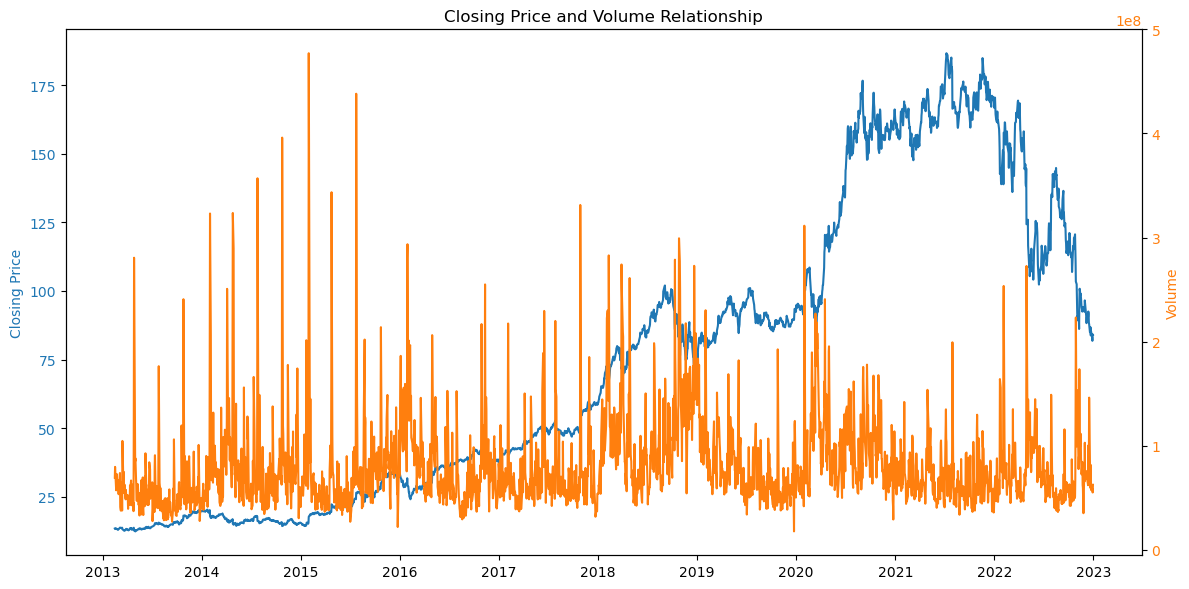

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(amzndata['Close'], label='Close', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Volume', color=color)
ax2.plot(amzndata['Volume'], label='Volume', color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Closing Price and Volume Relationship')
fig.tight_layout()
plt.show()


Figure 2: Plot for 3day, 10day,30day MA 

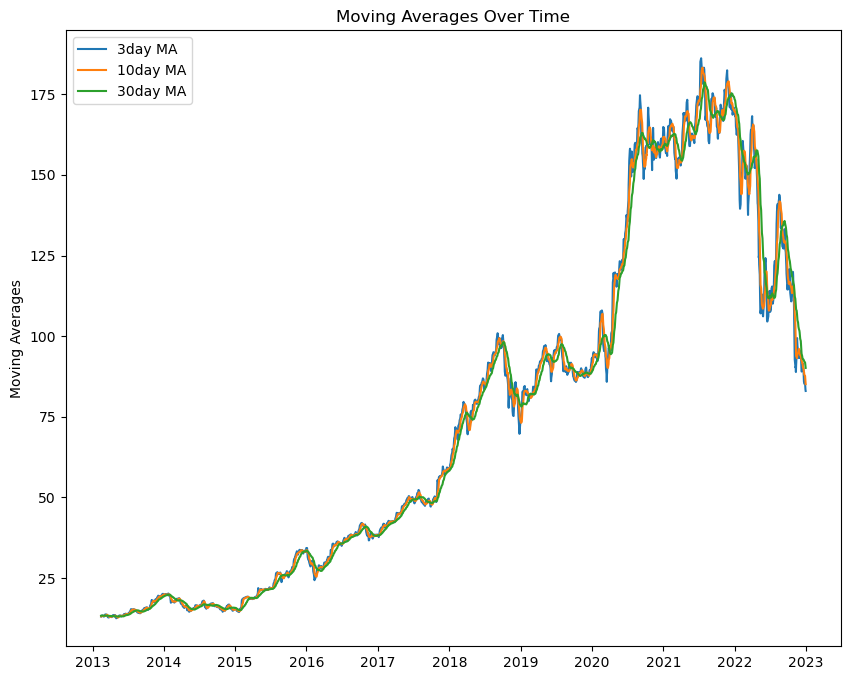

In [11]:
plt.figure(figsize=(10,8 ))

plt.plot(amzndata['3day MA'], label='3day MA')
plt.plot(amzndata['10day MA'], label='10day MA')
plt.plot(amzndata['30day MA'], label='30day MA')

plt.title('Moving Averages Over Time')
plt.ylabel('Moving Averages')
plt.legend()
plt.show()

Figure 3: Plots for O-C,H-L and Std_dev

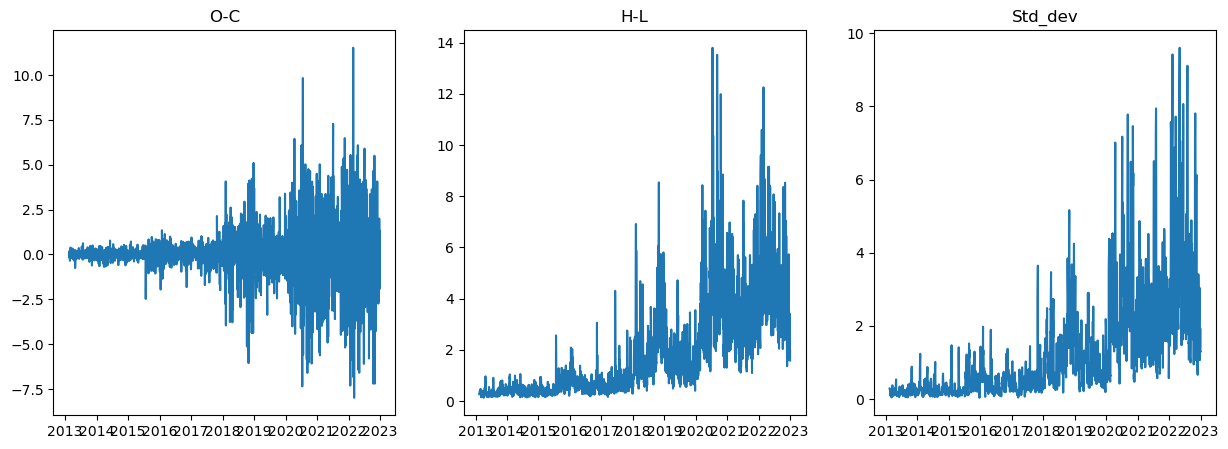

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(amzndata['O-C'])
axes[0].set_title('O-C')
axes[1].plot(amzndata['H-L'])
axes[1].set_title('H-L')
axes[2].plot(amzndata['Std_dev'])
axes[2].set_title('Std_dev')

plt.show()

Figure 4: 3day, 10day,30day MA histogram and density

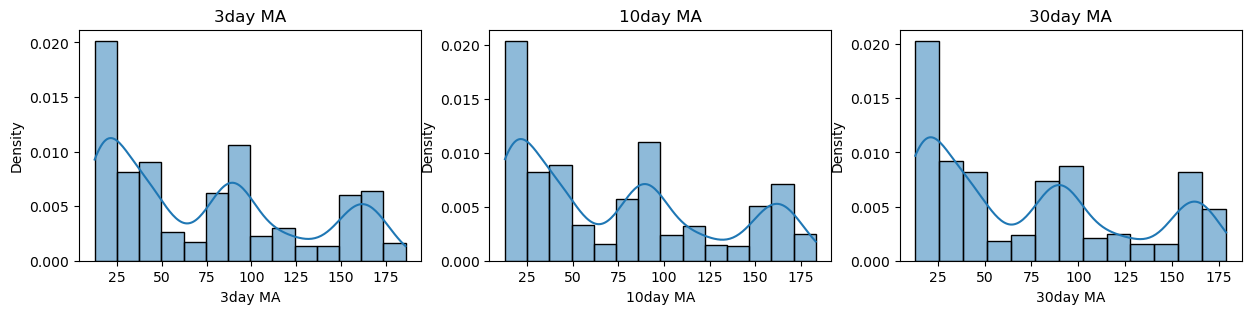

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))  # 1 row, 3 columns

sns.histplot(data=amzndata, x="3day MA", kde=True, stat="density", ax=axes[0])
axes[0].set_title('3day MA')

sns.histplot(data=amzndata, x="10day MA", kde=True, stat="density", ax=axes[1])
axes[1].set_title('10day MA')

sns.histplot(data=amzndata, x="30day MA", kde=True, stat="density", ax=axes[2])
axes[2].set_title('30day MA')

plt.show()

Figure 5: 3day, 10day,30day MA histogram and density

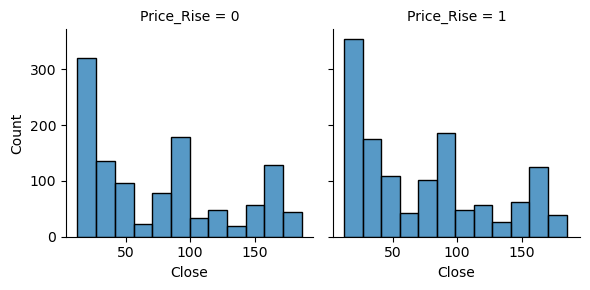

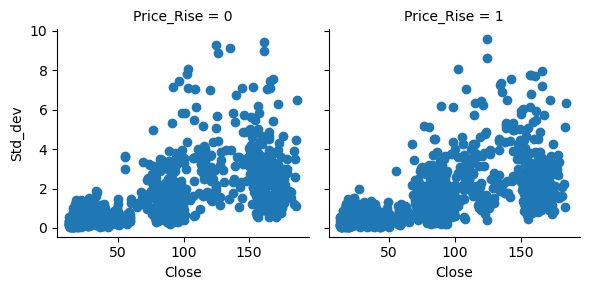

In [14]:
chart = sns.FacetGrid(amzndata, col='Price_Rise')  
chart.map(sns.histplot, 'Close') 

chart = sns.FacetGrid(amzndata, col='Price_Rise')  
chart.map(plt.scatter, 'Close','Std_dev')  

Fig 6: Descriptive Statistics of the Data set (description and information)

In [15]:
amzndata.describe()

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
count,2.488000e+03,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,8.025653e+07,74.552471,75.399285,73.601288,74.508956,1.797997,-0.043515,74.452280,74.352092,74.045907,1.303940,0.532958
std,4.223134e+07,53.249129,53.901596,52.517793,53.192284,1.856050,1.561140,53.203891,53.209464,53.229335,1.466109,0.499013
min,1.762600e+07,12.447000,12.646500,12.287500,12.411500,0.125500,-7.990494,12.529667,12.747400,13.070567,0.035102,0.000000
25%,5.364552e+07,24.938375,25.491250,24.634874,24.919250,0.432500,-0.404249,24.938000,25.102738,23.672679,0.279866,0.000000
50%,6.876000e+07,67.102253,68.581001,65.091499,67.089001,0.975502,-0.004749,65.830332,64.543424,60.951291,0.695143,1.000000
75%,9.303150e+07,108.757378,112.648251,107.055000,108.927498,2.710249,0.383000,109.952501,110.587412,111.901904,1.818740,1.000000
max,4.771220e+08,187.199997,188.654007,184.839493,186.570496,13.794998,11.520508,186.154999,183.275400,178.717716,9.604773,1.000000


In [16]:
amzndata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2488 entries, 2013-02-14 to 2022-12-30
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Volume      2488 non-null   int64  
 1   Open        2488 non-null   float64
 2   High        2488 non-null   float64
 3   Low         2488 non-null   float64
 4   Close       2488 non-null   float64
 5   H-L         2488 non-null   float64
 6   O-C         2488 non-null   float64
 7   3day MA     2488 non-null   float64
 8   10day MA    2488 non-null   float64
 9   30day MA    2488 non-null   float64
 10  Std_dev     2488 non-null   float64
 11  Price_Rise  2488 non-null   int32  
dtypes: float64(10), int32(1), int64(1)
memory usage: 243.0 KB


Fig 7: Correlation matrix of data variables

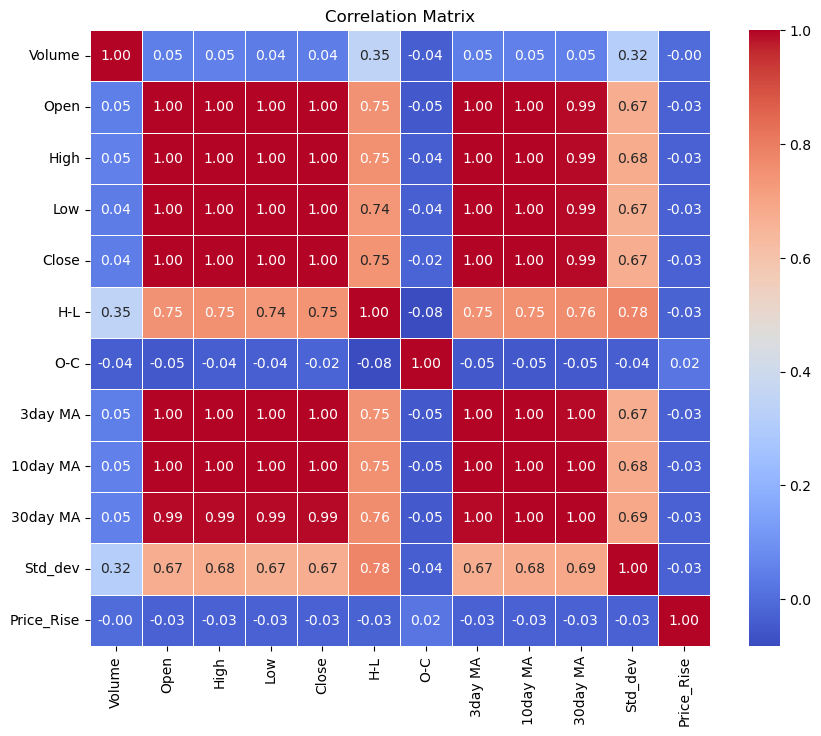

In [17]:
corr_matrix = amzndata.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**4.Machine Learning Classification Methods**

Data Preprocessing

In [18]:
#Set target variable y(Price_Rise 0 or 1 )and features x 
#(from H-L column to Std_dev column)
X = amzndata.iloc[:, 5:-1] 
Y = amzndata.iloc[:, -1]

In [19]:
X

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
Date,,,,,,
2013-02-14,0.262500,0.093500,13.089667,13.135750,13.329367,0.288771
2013-02-15,0.290500,-0.127000,13.290167,13.154450,13.349250,0.288036
2013-02-19,0.280499,0.192000,13.396667,13.154900,13.360267,0.236784
2013-02-20,0.396501,-0.189500,13.401333,13.203750,13.377933,0.105347
2013-02-21,0.311500,0.041000,13.354167,13.201350,13.374517,0.103956
...,...,...,...,...,...,...
2022-12-23,2.849998,2.000000,85.250000,88.068999,92.181999,1.064508
2022-12-27,2.349998,-1.930000,85.269999,87.685000,91.802666,1.445066
2022-12-28,1.790001,-0.980003,84.026667,86.934000,91.211000,1.927674


In [20]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                   shuffle=False)
X_test


,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
Date,,,,,,
2021-01-11,2.319000,-1.690002,158.054001,161.049051,159.645550,2.008823
2021-01-12,2.806992,0.041504,157.651164,160.756650,159.527450,1.432383
2021-01-13,3.393494,1.872498,156.962331,159.941000,159.403267,1.499564
2021-01-14,2.870499,-2.002502,156.682165,159.160449,159.399684,1.512147
2021-01-15,2.369003,-0.938507,156.903168,158.368550,159.245334,1.180774
...,...,...,...,...,...,...
2022-12-23,2.849998,2.000000,85.250000,88.068999,92.181999,1.064508
2022-12-27,2.349998,-1.930000,85.269999,87.685000,91.802666,1.445066
2022-12-28,1.790001,-0.980003,84.026667,86.934000,91.211000,1.927674


In [21]:
# Standardize the features (optional but can be beneficial for 
#logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**4.a.Logistic Regression**

In [22]:
# Model
modellr = LogisticRegression(random_state=101)
# Train the model
modellr.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modellr.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.44      0.14      0.21       255
           1       0.47      0.82      0.60       243

    accuracy                           0.47       498
   macro avg       0.46      0.48      0.41       498
weighted avg       0.46      0.47      0.40       498



**4.b.Extra Trees**

In [23]:
#Model
modelet = ExtraTreesClassifier(random_state=101)
# Train the model
modelet.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modelet.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.51      0.42      0.46       255
           1       0.49      0.58      0.53       243

    accuracy                           0.50       498
   macro avg       0.50      0.50      0.50       498
weighted avg       0.50      0.50      0.49       498



**5.Cross Validation**



**5.a.Cross Validation for Logistic Regression**


In [24]:
accuracy_scores = cross_val_score(modellr, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Print mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.52
Standard Deviation: 0.02


**5.a.Cross Validation for Extra Tree**

In [25]:
accuracy_scores = cross_val_score(modelet, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation Accuracy: {accuracy_scores.std():.2f}")


Mean Accuracy: 0.47
Standard Deviation Accuracy: 0.03


**7.Prediction of Price Rise Using Extra Trees on X_test Data**

Model (repeated)

In [26]:
modelet = ExtraTreesClassifier(random_state=101)
modelet.fit(X_train, Y_train)
Y_pred = modelet.predict(X_test)

classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.42      0.46       255
           1       0.49      0.58      0.53       243

    accuracy                           0.50       498
   macro avg       0.50      0.50      0.50       498
weighted avg       0.50      0.50      0.49       498



Fig 8: Confusion Matrix of the modelet(Extra Tree classification model)

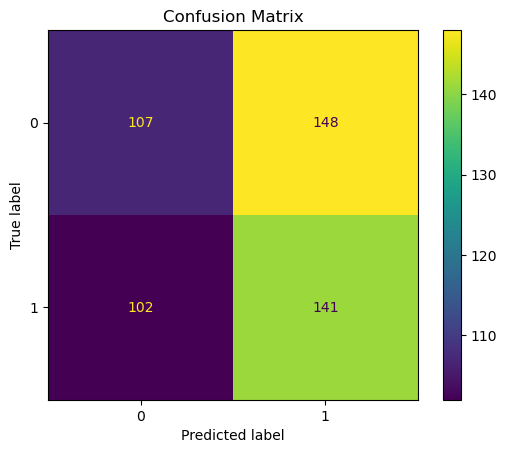

In [27]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Evaluate the modelet by means of a Confusion Matrix
matrix = ConfusionMatrixDisplay.from_estimator(modelet, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

Fig 9: Roc Curve of the modelet(Extra Tree classification model)

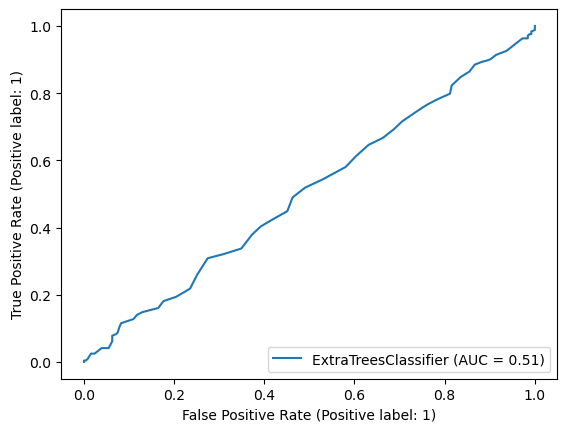

In [28]:
# ROC Curve
log_disp = RocCurveDisplay.from_estimator(modelet, X_test, Y_test)

Fig 10: Importance of classifiers in modelet

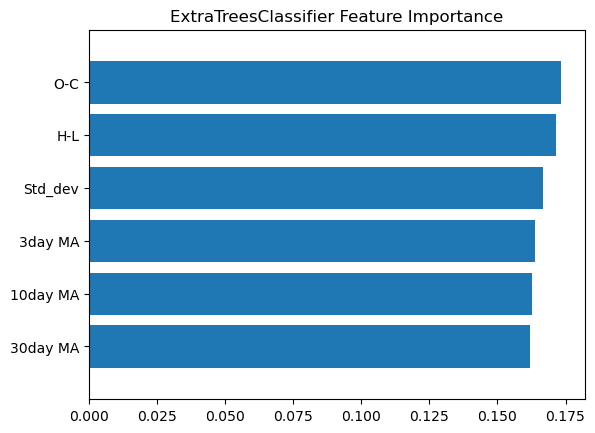

In [29]:
#Importance of classifiers 
feature_names=X.columns
importance = modelet.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("ExtraTreesClassifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()

**8.Market and Return Strategies**

Data Preprocessing

In [30]:
#Create new column Y_pred
amzndata['Y_pred'] = np.NaN
amzndata.iloc[(len(amzndata) - len(Y_pred)):,-1] = Y_pred
trade_amzndata = amzndata.dropna()
trade_amzndata

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred
Date,,,,,,,,,,,,,
2021-01-11,73668000,157.400497,157.819000,155.500000,155.710495,2.319000,-1.690002,158.054001,161.049051,159.645550,2.008823,1,1.0
2021-01-12,70292000,156.000000,157.106995,154.300003,156.041504,2.806992,0.041504,157.651164,160.756650,159.527450,1.432383,1,0.0
2021-01-13,66424000,156.421997,159.497498,156.104004,158.294495,3.393494,1.872498,156.962331,159.941000,159.403267,1.499564,0,1.0
2021-01-14,61418000,158.376007,158.899994,156.029495,156.373505,2.870499,-2.002502,156.682165,159.160449,159.399684,1.512147,0,1.0
2021-01-15,84880000,156.151001,157.127502,154.758499,155.212494,2.369003,-0.938507,156.903168,158.368550,159.245334,1.180774,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,57433700,83.250000,85.779999,82.930000,85.250000,2.849998,2.000000,85.250000,88.068999,92.181999,1.064508,0,1.0
2022-12-27,57284000,84.970001,85.349998,83.000000,83.040001,2.349998,-1.930000,85.269999,87.685000,91.802666,1.445066,0,1.0
2022-12-28,58228600,82.800003,83.480003,81.690002,81.820000,1.790001,-0.980003,84.026667,86.934000,91.211000,1.927674,1,1.0


Computation of market returns 

In [31]:
trade_amzndata['Tomorrows Returns'] = 0.
trade_amzndata['Tomorrows Returns'] = np.log(trade_amzndata['Close']/trade_amzndata['Close'].shift(1))
trade_amzndata['Tomorrows Returns'] = trade_amzndata['Tomorrows Returns'].shift(-1)
trade_amzndata

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns
Date,,,,,,,,,,,,,,
2021-01-11,73668000,157.400497,157.819000,155.500000,155.710495,2.319000,-1.690002,158.054001,161.049051,159.645550,2.008823,1,1.0,0.002124
2021-01-12,70292000,156.000000,157.106995,154.300003,156.041504,2.806992,0.041504,157.651164,160.756650,159.527450,1.432383,1,0.0,0.014335
2021-01-13,66424000,156.421997,159.497498,156.104004,158.294495,3.393494,1.872498,156.962331,159.941000,159.403267,1.499564,0,1.0,-0.012210
2021-01-14,61418000,158.376007,158.899994,156.029495,156.373505,2.870499,-2.002502,156.682165,159.160449,159.399684,1.512147,0,1.0,-0.007452
2021-01-15,84880000,156.151001,157.127502,154.758499,155.212494,2.369003,-0.938507,156.903168,158.368550,159.245334,1.180774,1,0.0,0.005304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,57433700,83.250000,85.779999,82.930000,85.250000,2.849998,2.000000,85.250000,88.068999,92.181999,1.064508,0,1.0,-0.026266
2022-12-27,57284000,84.970001,85.349998,83.000000,83.040001,2.349998,-1.930000,85.269999,87.685000,91.802666,1.445066,0,1.0,-0.014801
2022-12-28,58228600,82.800003,83.480003,81.690002,81.820000,1.790001,-0.980003,84.026667,86.934000,91.211000,1.927674,1,1.0,0.028436


Computation of strategy returns 

In [32]:
#Strategy Returns based on Y_Pred
trade_amzndata['Strategy Returns'] = 0.
trade_amzndata['Strategy Returns'] = np.where(trade_amzndata['Y_pred'] == True,
                                 trade_amzndata['Tomorrows Returns'], - trade_amzndata['Tomorrows Returns'])
trade_amzndata

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns,Strategy Returns
Date,,,,,,,,,,,,,,,
2021-01-11,73668000,157.400497,157.819000,155.500000,155.710495,2.319000,-1.690002,158.054001,161.049051,159.645550,2.008823,1,1.0,0.002124,0.002124
2021-01-12,70292000,156.000000,157.106995,154.300003,156.041504,2.806992,0.041504,157.651164,160.756650,159.527450,1.432383,1,0.0,0.014335,-0.014335
2021-01-13,66424000,156.421997,159.497498,156.104004,158.294495,3.393494,1.872498,156.962331,159.941000,159.403267,1.499564,0,1.0,-0.012210,-0.012210
2021-01-14,61418000,158.376007,158.899994,156.029495,156.373505,2.870499,-2.002502,156.682165,159.160449,159.399684,1.512147,0,1.0,-0.007452,-0.007452
2021-01-15,84880000,156.151001,157.127502,154.758499,155.212494,2.369003,-0.938507,156.903168,158.368550,159.245334,1.180774,1,0.0,0.005304,-0.005304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,57433700,83.250000,85.779999,82.930000,85.250000,2.849998,2.000000,85.250000,88.068999,92.181999,1.064508,0,1.0,-0.026266,-0.026266
2022-12-27,57284000,84.970001,85.349998,83.000000,83.040001,2.349998,-1.930000,85.269999,87.685000,91.802666,1.445066,0,1.0,-0.014801,-0.014801
2022-12-28,58228600,82.800003,83.480003,81.690002,81.820000,1.790001,-0.980003,84.026667,86.934000,91.211000,1.927674,1,1.0,0.028436,0.028436


**9.Cummulative Market and Strategies Returns**

Computation of cummulative market and strategy returns 

In [33]:
trade_amzndata['Cumulative Market Returns'] = np.cumsum(trade_amzndata['Tomorrows Returns'])
trade_amzndata['Cumulative Strategy Returns'] = np.cumsum(trade_amzndata['Strategy Returns'])

Fig 11: Plot of cummulative market and strategy returns based on Y_prediction

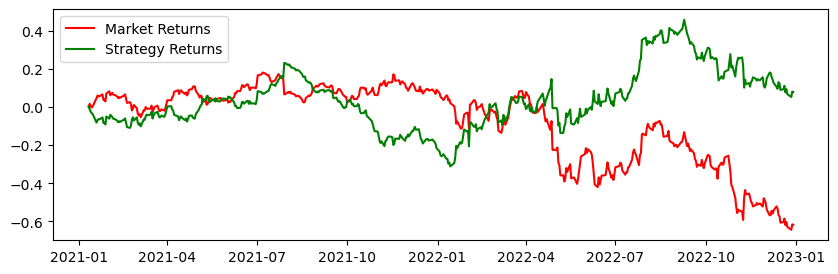

In [41]:
plt.figure(figsize=(10,3))
plt.plot(trade_amzndata['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_amzndata['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()
